$\newcommand{\ket}[1]{\left|#1\right>}$

$\newcommand{\bra}[1]{\left<#1\right|}$

$\newcommand{\braket}[2]{\left<#1 | #2\right>}$

# Multiple Qbits

Everything here is taken from the IBM quantum computing User Guide and introduction to quantum computing:

https://quantum-computing.ibm.com/docs/guide/mult-entang/multiple-qubits

Up to now, we have seen the properties of a qbit and how we can manipulate it.

Even more interesting is to see the behaviour of systems of more than one qbit and how we can work with them.

We can describe the system of $n$ qbits as a complex vector of $2^n$ dimensions.
For example, we can describe a system of 2 qbits as the linear superposition of 4 state vectors:

$\{ \ket{00}, \ket{01}, \ket{10}, \ket{11} \}$

where in each vector, the first position refers to the state of the first qbit and the second position refers to the second qbit.

Now, a classical computer with $n$ bits can assume $2^n$ configurations, but the main difference with respect to a quantum computer is that this one can be in a state of superposition of several states, with qbits entangled together, allowing a much wider range of possibilities.

In other words, a classical computer with 2 bits can be in any of the following 4 states:
- 00
- 01
- 10
- 11

While a quantum computer can be ni any of the following (potentially) infinite states:

$\ket{\psi} =  \alpha \ket{00} + \beta \ket{01} + \gamma \ket{10} + \delta \ket{11} $ <br>

with:

$\alpha^2 + \beta^2 + \gamma^2 + \delta^2 = 1$

## Multiple Qbits Control

In addition to the operators that we already know to control the state of a qbit, we need operators to control more than one qbit or to change the state of a qbit depending on the state of another one.

### The Control Gate (CNOT operator)

This control gate allows two qbits to *communicate*, in particular putting one qbit in control of the other.

More explicitly, this gate changes the state of the target qbit from $\ket{0}$ to $\ket{1}$ (or from $\ket{1}$ to $\ket{0}$) if the control qbit is in the $\ket{1}$ state, otherwise does nothing.

If we write the possible states of a 2-qbit quantum cicuit as a vector:

$ 
\begin{bmatrix}
    \ket{00} \\
    \ket{01} \\
    \ket{10} \\
    \ket{11} \\
\end{bmatrix}
$

Then we can express the CNOT operator as follows:

$ CNOT =
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
\end{bmatrix}
$

So that we can see the effect on a pair of qbits in each of the possible states:

$ 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
    \ket{00} \\
    \ket{01} \\
    \ket{10} \\
    \ket{11} \\
\end{bmatrix}
= 
\begin{bmatrix}
    \ket{00} \\
    \ket{01} \\
    \ket{11} \\
    \ket{10} \\
\end{bmatrix}
$


Let's see how the CNOT gate operates with some examples.

#### 1. Control and target qbit in the fundamental state: $\ket{00}$

Let's start by applying a CNOT gate keeping the control qbit in the fundamental state $\ket{0}$, when also the target qbit is in the $\ket{0}$ state.

We expect, in this case, to see no effect on the target qbit state.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [1]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [2]:
# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
double_q_measurement = QuantumCircuit(q, c)

# Keep the system in the |00> state

# Use the qbit-0 to control the qbit-1 through a cnot 
double_q_measurement.cnot(0,1)
double_q_measurement.measure(q, c)

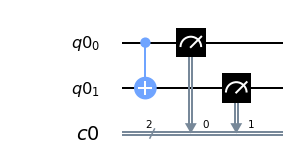

In [3]:
# Draw the circuit
double_q_measurement.draw(output='mpl')

In [4]:
# Execute the circuit
job = execute(double_q_measurement, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [5]:
# Print the result
print(result.get_counts(double_q_measurement))

{'00': 1024}


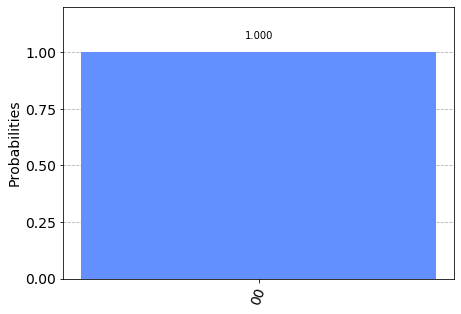

In [6]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(double_q_measurement))

#### 2. Control qbit in the fundamental state and target qbit in the excited state: $\ket{01}$

Let's try something similar to the previous case, but now with the target qbit in the $\ket{1}$ state.

Also in this case, we expect to see no effect on the target qbit state.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [3]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [4]:
# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
double_q_measurement = QuantumCircuit(q, c)

# Put the system in the |01> state
double_q_measurement.x(1)

# Use the qbit-0 to control the qbit-1 through a cnot 
double_q_measurement.cnot(0,1)
double_q_measurement.measure(q, c)

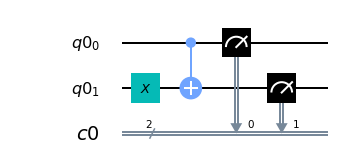

In [5]:
# Draw the circuit
double_q_measurement.draw(output='mpl')

In [6]:
# Execute the circuit
job = execute(double_q_measurement, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [7]:
# Print the result
print(result.get_counts(double_q_measurement))

{'10': 1024}


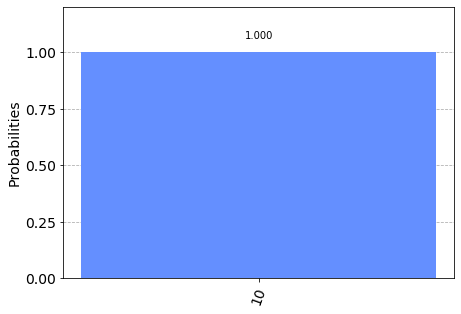

In [8]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(double_q_measurement))

#### 3. Control qbit in the excited state and target qbit in the fundamental state: $\ket{10}$

Now we want the conotrol qbit to flip the state of the target qbit, so that we put it in the $\ket{1}$ state.

In this example, we will keep the target qbit in the fundamental state $\ket{0}$.

To summarize, we start in the $\ket{10}$ state and we expect to finish in the $\ket{11}$ state.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [9]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [10]:
# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
double_q_measurement = QuantumCircuit(q, c)

# Put the system in the |10> state
double_q_measurement.x(0)

# Use the qbit-0 to control the qbit-1 through a cnot 
double_q_measurement.cnot(0,1)
double_q_measurement.measure(q, c)

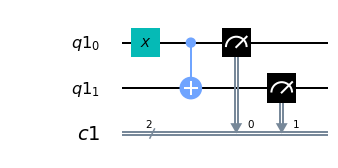

In [11]:
# Draw the circuit
double_q_measurement.draw(output='mpl')

In [12]:
# Execute the circuit
job = execute(double_q_measurement, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [13]:
# Print the result
print(result.get_counts(double_q_measurement))

{'11': 1024}


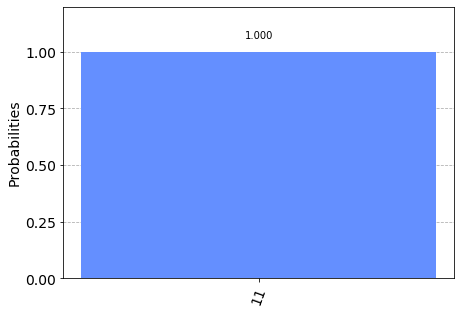

In [14]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(double_q_measurement))

#### 4. Control and target qbits in the excited state: $\ket{11}$

Now we want the conotrol qbit to flip the state of the target qbit, so that we put it in the $\ket{1}$ state.

In this last example, we will put the target qbit in the excited state $\ket{1}$.

To summarize, we start in the $\ket{11}$ state and we expect to finish in the $\ket{10}$ state.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [19]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [15]:
# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
double_q_measurement = QuantumCircuit(q, c)

# Put the system in the |11> state
double_q_measurement.x(0)
double_q_measurement.x(1)

# Use the qbit-0 to control the qbit-1 through a cnot 
double_q_measurement.cnot(0,1)
double_q_measurement.measure(q, c)

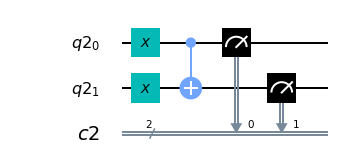

In [16]:
# Draw the circuit
double_q_measurement.draw(output='mpl')

In [17]:
# Execute the circuit
job = execute(double_q_measurement, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [18]:
# Print the result
print(result.get_counts(double_q_measurement))

{'01': 1024}


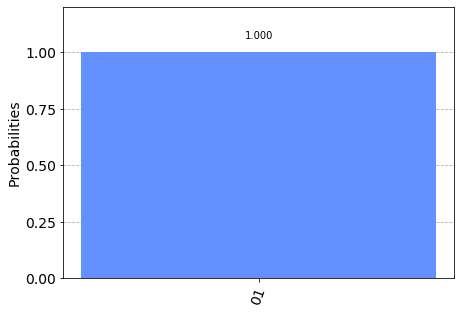

In [19]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(double_q_measurement))